## Multiple Linear Regression Model for predicting electric consumption (KWH)
by Emeka Thompson

07/21/22

### Approach (Methodology)
1. Understanding the problem:- 
The data consists of 940 variables/fields and 12083 rows of data. The response variable is **KWH** - electrical consumption.
The problem with making a prediction with 939 variables will be the curse of dimensionality and multiple colinearity. One method to approach this problem is to reduce the number of variable by features reduction. The field is numerical and continuous and can be predicted by regression methods.
2. Importing relevant libraries:- 
The libraries imported below are relevant for manipulating, visualizing and choosing the features of the data set provided.
3. Loading and preparing and analyzing data:- 
The downloaded data was loaded as a dataframe (data). A brief summary of data table can be viewed, verifying 940 columns.
The data table was also analyzed for missing data and then the categorical variables were removed from the dataset. There are many ways to deal with categorical variables like converting or onehotencoding but for this problem, an _assumption_ is that they have been represented with other variables and can be removed.
4. Creating X and y variables:- 
The variable of interest (target column)is separated from the dataframe as y while the other variable are grouped as features, X.
5. Features selection:- 
There are several methods to select features for regression analysis. Here, bestfeatures using f_regresssion and multiple colinearity was used to select the best 10 features that for predicting KWH. The first step is to find the best 15 features. A new dataframe with the 15 features was created. This dataframe was tested for colinearity. The rationale was to reduce reduntancy from the variables used in training the model. five(5) features with similar correlations were removed and a new dataframe of the best 10 features was created.
6. Splitting the data into training and testing sets:- 
Train and test splits are created to model the data. The train and test splits for the features are scaled using standard scaler.
7. Prediction with multiple linear regression:- 
The linear regression model was imported from scikit learn and used to fit the the train sets and predict the KWH on the test set. Key metrics (MAE, MSE and RMSE) from the regression model were also calculated.


In [1]:
#Importing relevant libraries

# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlit and seaborn for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# feature selection tools for feature engineering
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# memory management
import gc


In [2]:
# loading data
data = pd.read_csv('./recs2009_public.csv')
data.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [3]:
#Searching for missing values
data.isna().sum().sum()

0

In [4]:
# Dropping all non numeric columns in the dataframe.
data = data.drop(data.select_dtypes(include=[object]),axis=1)

In [5]:
#Creating X and y variables
X = data.drop('KWH', axis =1)  #independent columns
y = data['KWH'] #target column i.e KWH


In [6]:
# Applying SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=f_regression, k=15)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concating two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best feature

        Features         Score
840        BTUEL  9.205575e+13
845     BTUELOTH  4.163837e+04
839       KWHOTH  4.163834e+04
846     DOLLAREL  3.716097e+04
851     DOLELOTH  1.175479e+04
907  TOTALBTUOTH  1.017260e+04
913  TOTALDOLOTH  9.113650e+03
842     BTUELCOL  9.082572e+03
836       KWHCOL  9.082571e+03
904  TOTALBTUCOL  9.082570e+03
906  TOTALBTURFG  8.320485e+03
838       KWHRFG  8.320471e+03
844     BTUELRFG  8.320468e+03
908     TOTALDOL  7.864070e+03
910  TOTALDOLCOL  6.853435e+03


In [7]:
#Creating dataframes from selected features
x_new = X[['BTUEL', 'BTUELOTH', 'KWHOTH', 'DOLLAREL', 'DOLELOTH', 'TOTALBTUOTH', 'TOTALDOLOTH', 'BTUELCOL', 'TOTALBTUCOL', 'KWHCOL', 'TOTALBTURFG', 'BTUELRFG', 'KWHRFG', 'TOTALDOL', 'TOTALDOLCOL']]
x_new.shape

(12083, 15)

<AxesSubplot:>

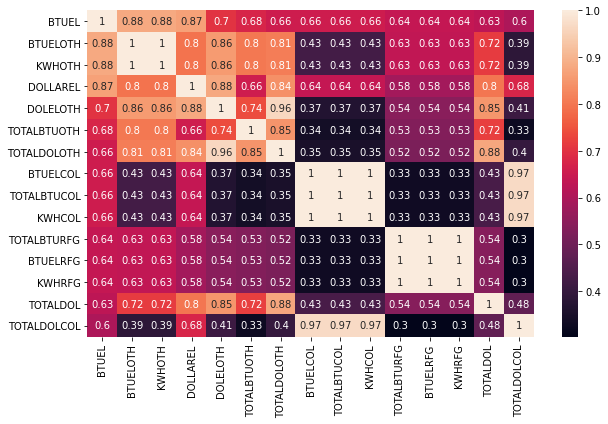

In [8]:
# Correlation matrix
cor = x_new.corr()

# Plotting heatmap
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

In [9]:
# Creating dataframes from selected features
# Variables with multiple colinearity, like BTUELOTH, BTEEEULRFG,TOTALBTURFG, TOTALBTUCOL, BTEULCOL were droped from the dataframe to leave 10 features
x_new = x_new[['BTUEL', 'KWHOTH', 'DOLLAREL', 'DOLELOTH', 'TOTALBTUOTH', 'TOTALDOLOTH', 'KWHCOL', 'KWHRFG', 'TOTALDOL', 'TOTALDOLCOL']]
x_new.shape

(12083, 10)

In [10]:
# Creating Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.3,random_state = 42)

In [11]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
#x2 = pd.DataFrame(x_train2)

In [14]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('\033[1m' + '***PREDICTION REPORT***' + '\033[0m' '\n')
print('Method: {}'.format(name))  

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),x_new.columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x_new.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

***PREDICTION REPORT***

Method: Linear Regression

Intercept: 11404.82


             Coefficients
BTUEL         7836.494501
KWHOTH           0.005006
DOLLAREL        -0.006559
DOLELOTH        -0.001366
TOTALBTUOTH     -0.002735
TOTALDOLOTH      0.007151
KWHCOL          -0.003013
KWHRFG          -0.000006
TOTALDOL        -0.003870
TOTALDOLCOL      0.006233

R2: 1.00
Adj_R2: 1.00

Mean Absolute Error: 0.08
Mean Squared Error: 0.01
Root Mean Squared Error: 0.09


In [17]:
# Forecast Table
# The forcast table allows us to compare the actual KWH values with the predicted KWH values.

predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
5155,11486,11485.9,-0.1
7034,10604,10603.8,-0.2
1786,14658,14658.0,-0.0
1491,9555,9555.1,0.1
2128,15845,15845.0,-0.0
